In [1]:
import nltk
import pandas as pd
from nltk import tokenize
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [2]:
data = pd.read_json("C:\\Users\\Eduardo\\Pictures\\1\\News_Category_Dataset_v2.json", lines=True)

In [3]:
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [4]:
headline_and_short_description = data.headline + " " + data.short_description

In [5]:
headline_and_short_description.head()

0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
2    Hugh Grant Marries For The First Time At Age 5...
3    Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4    Julianna Margulies Uses Donald Trump Poop Bags...
dtype: object

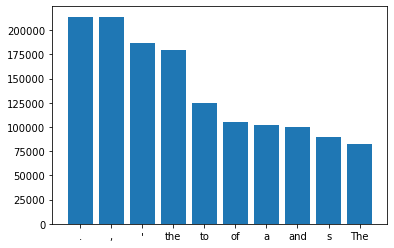

In [6]:
token_pontuation = tokenize.WordPunctTokenizer()

def grafic(text_):
    all_the_words = ' '.join((text for text in text_))
    token_texts = token_pontuation.tokenize(all_the_words)
    frequency = nltk.FreqDist(token_texts)
    df_frequency = pd.DataFrame({'word': list(frequency.keys()), 'frequency': list(frequency.values())})
    top_10_frequency = df_frequency.nlargest(columns="frequency", n=10)
    plt.bar(x=top_10_frequency.word,
        height=top_10_frequency.frequency)

grafic(headline_and_short_description)

In [7]:
stopwords = nltk.corpus.stopwords.words("english")

stopwords_with_pontuation = stopwords + list(punctuation)

In [8]:
processed_phrases = []

for opinion in headline_and_short_description:
    new_phrase = []
    token_opinion = token_pontuation.tokenize(opinion.lower())
    for word in token_opinion:
        if word not in stopwords_with_pontuation:
            new_phrase.append(word)
    processed_phrases.append(' '.join(new_phrase))

data['processed_phrases']  = processed_phrases

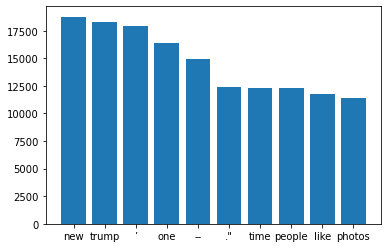

In [9]:
grafic(data.processed_phrases)

<BarContainer object of 10 artists>

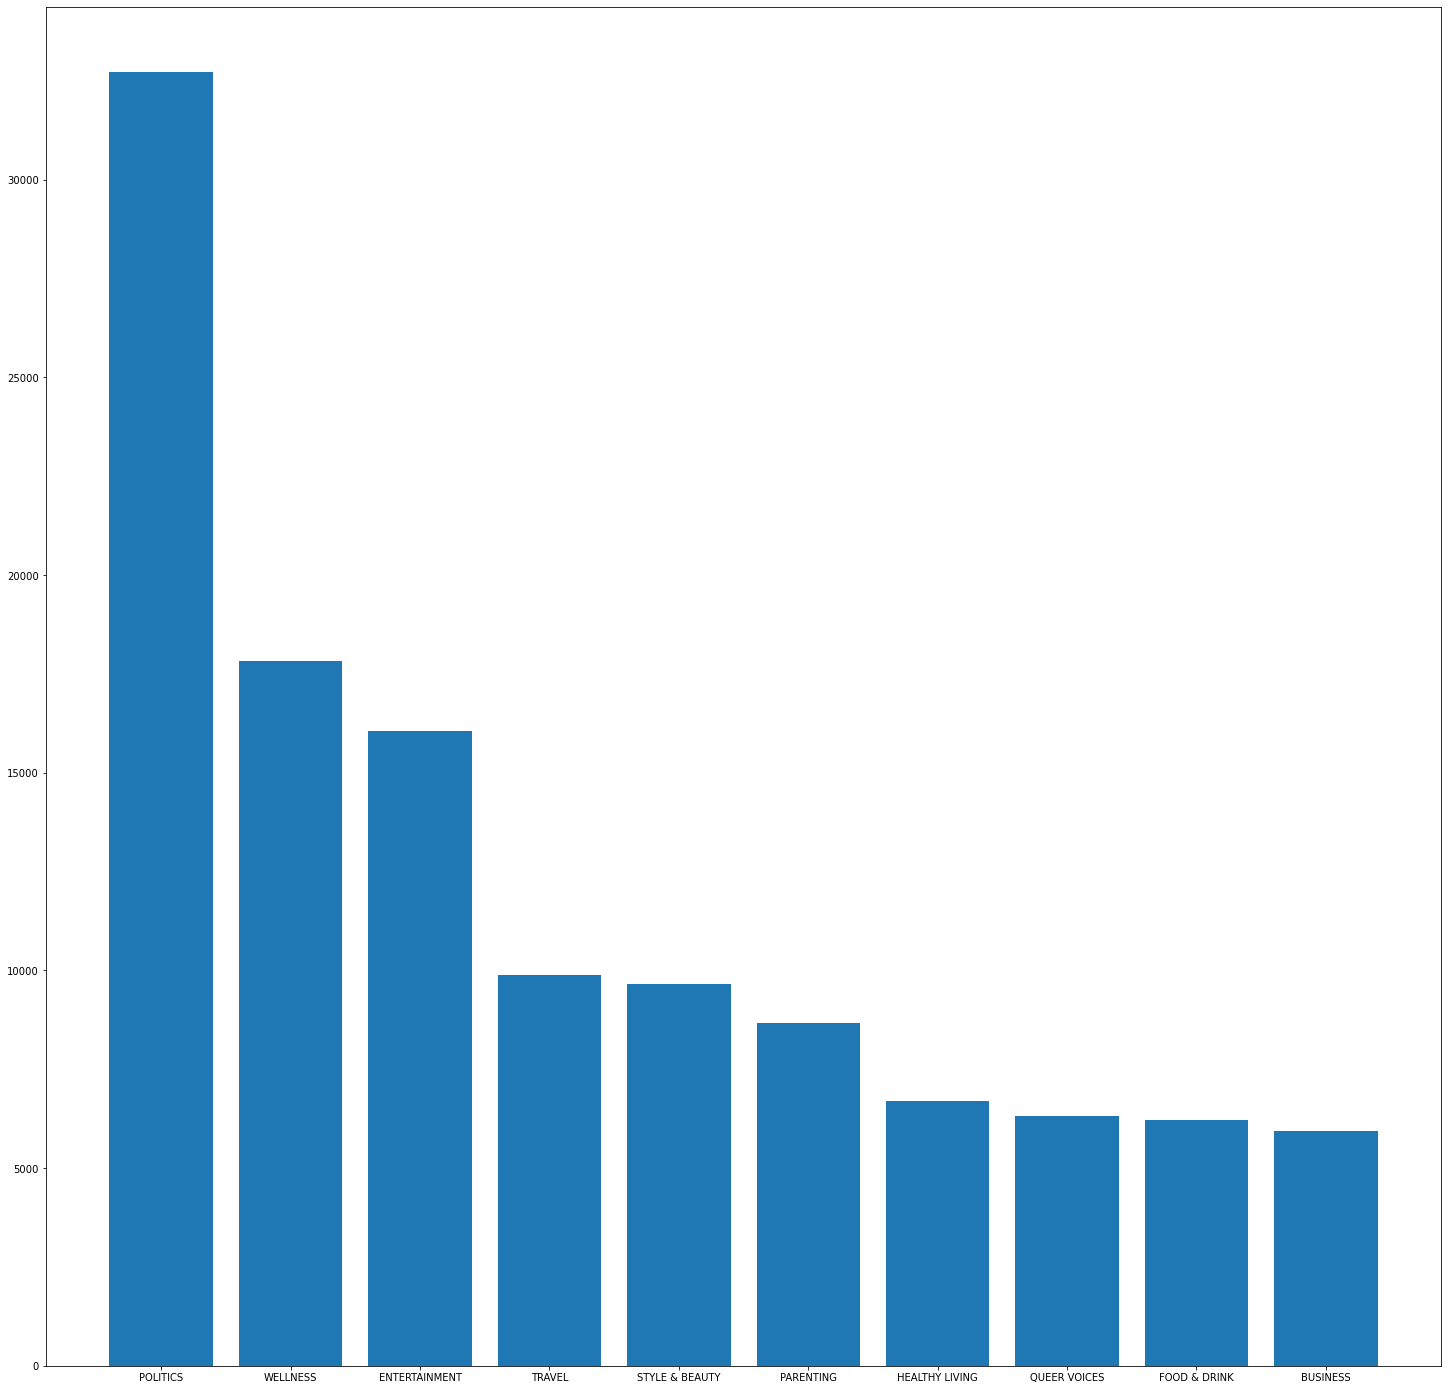

In [10]:
frequency = nltk.FreqDist(data.category.values)
df_frequency = pd.DataFrame({'word': list(frequency.keys()), 'frequency': list(frequency.values())})
top_10_frequency = df_frequency.nlargest(columns="frequency", n=10)
plt.figure(figsize=(25, 25))
plt.bar(x=top_10_frequency.word,height=top_10_frequency.frequency)

In [11]:
unique_categoryes = set(data.category.values)

In [12]:
multi_class_labels = {list(unique_categoryes)[i] : i for i in range(len(unique_categoryes))}

multi_class_labels

{'COMEDY': 0,
 'WEDDINGS': 1,
 'SPORTS': 2,
 'GOOD NEWS': 3,
 'SCIENCE': 4,
 'WORLD NEWS': 5,
 'THE WORLDPOST': 6,
 'COLLEGE': 7,
 'HEALTHY LIVING': 8,
 'FIFTY': 9,
 'BUSINESS': 10,
 'IMPACT': 11,
 'TRAVEL': 12,
 'STYLE & BEAUTY': 13,
 'PARENTING': 14,
 'POLITICS': 15,
 'CULTURE & ARTS': 16,
 'WORLDPOST': 17,
 'EDUCATION': 18,
 'WEIRD NEWS': 19,
 'STYLE': 20,
 'TASTE': 21,
 'WELLNESS': 22,
 'MONEY': 23,
 'GREEN': 24,
 'DIVORCE': 25,
 'ARTS': 26,
 'WOMEN': 27,
 'CRIME': 28,
 'MEDIA': 29,
 'RELIGION': 30,
 'HOME & LIVING': 31,
 'TECH': 32,
 'LATINO VOICES': 33,
 'QUEER VOICES': 34,
 'BLACK VOICES': 35,
 'ARTS & CULTURE': 36,
 'FOOD & DRINK': 37,
 'ENTERTAINMENT': 38,
 'PARENTS': 39,
 'ENVIRONMENT': 40}

In [13]:
data['labels'] = data.category.map(multi_class_labels)

In [14]:
data.head()

,category,headline,authors,link,short_description,date,processed_phrases,labels
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,2 mass shootings texas last week 1 tv left hus...,28
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith joins diplo nicky jam 2018 world cup off...,38
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time age 57 actor lon...,38
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts castrato adam schiff democra...,38
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...,38


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer()
bag_of_words = vetorizador.fit_transform(data["processed_phrases"])

In [16]:
def classificar_texto_regression(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=30000)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [17]:
classificar_texto_regression(data, "processed_phrases", "labels")

0.5946150475962879

In [18]:
def classificar_texto_naive(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=30000)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    clf = MultinomialNB()
    clf.fit(treino, classe_treino)
    return clf.score(teste, classe_teste)

In [19]:
classificar_texto_naive(data, "processed_phrases", "labels")

0.5871470107938025

In [20]:
stemmer = nltk.RSLPStemmer()

processed_phrases = []

for opinion in data["processed_phrases"]:
    new_phrase = []
    token_opinion = token_pontuation.tokenize(opinion)
    for word in token_opinion:
        new_phrase.append(stemmer.stem(word))
    processed_phrases.append(' '.join(new_phrase))


data["text_stemmer"] = processed_phrases

In [21]:
data.head()

,category,headline,authors,link,short_description,date,processed_phrases,labels,text_stemmer
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,2 mass shootings texas last week 1 tv left hus...,28,2 mas shooting tex last week 1 tv left husband...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith joins diplo nicky jam 2018 world cup off...,38,smith joim dipl nicky jam 2018 world cup offic...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time age 57 actor lon...,38,hugh grant marri first tim age 57 act longtim ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts castrato adam schiff democra...,38,jim carrey blast castrat ad schiff democrat ne...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...,38,juliann marguli use donald trump poop bag pick...


In [22]:
data.processed_phrases[:3][2]

'hugh grant marries first time age 57 actor longtime girlfriend anna eberstein tied knot civil ceremony'

In [23]:
data.text_stemmer[:3][2]

'hugh grant marri first tim age 57 act longtim girlfriend ann eberstein tied knot civil ceremony'

In [24]:
classificar_texto_naive(data, "text_stemmer", "category")

0.5800772692874497

In [25]:
classificar_texto_regression(data, "text_stemmer", "category")

0.589317720157725

In [26]:
# 0.589317720157725 % | max_features=30000

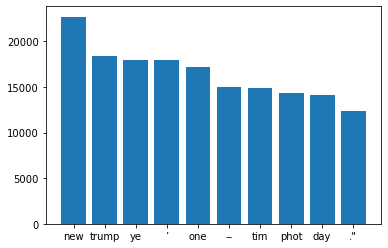

In [27]:
grafic(data.text_stemmer)

In [28]:
processed_phrases = []

for opinion in data["text_stemmer"]:
    new_phrase = []
    token_opinion = token_pontuation.tokenize(opinion)
    for word in token_opinion:
        if word not in ['’', '--', '."']:
            new_phrase.append(word)
    processed_phrases.append(' '.join(new_phrase))


data["stemmer_v2"] = processed_phrases

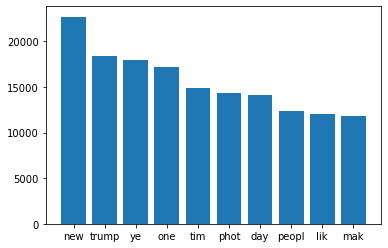

In [29]:
grafic(data.stemmer_v2)

In [30]:
processed_phrases = []

for opinion in data["processed_phrases"]:
    new_phrase = []
    token_opinion = token_pontuation.tokenize(opinion)
    for word in token_opinion:
        if word not in ['’', '--', '."']:
            new_phrase.append(word)
    processed_phrases.append(' '.join(new_phrase))


data["processed_v2"] = processed_phrases

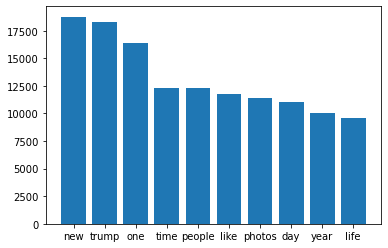

In [31]:
grafic(data.processed_v2)

In [32]:
classificar_texto_regression(data, "processed_v2", "labels")

0.5946150475962879

In [33]:
data.head()

,category,headline,authors,link,short_description,date,processed_phrases,labels,text_stemmer,stemmer_v2,processed_v2
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,2 mass shootings texas last week 1 tv left hus...,28,2 mas shooting tex last week 1 tv left husband...,2 mas shooting tex last week 1 tv left husband...,2 mass shootings texas last week 1 tv left hus...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith joins diplo nicky jam 2018 world cup off...,38,smith joim dipl nicky jam 2018 world cup offic...,smith joim dipl nicky jam 2018 world cup offic...,smith joins diplo nicky jam 2018 world cup off...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time age 57 actor lon...,38,hugh grant marri first tim age 57 act longtim ...,hugh grant marri first tim age 57 act longtim ...,hugh grant marries first time age 57 actor lon...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts castrato adam schiff democra...,38,jim carrey blast castrat ad schiff democrat ne...,jim carrey blast castrat ad schiff democrat ne...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...,38,juliann marguli use donald trump poop bag pick...,juliann marguli use donald trump poop bag pick...,julianna margulies uses donald trump poop bags...


In [ ]:
classificar_texto_regression(data, "stemmer_v2", "labels")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features = 30000)

bag_of_words = tfidf.fit_transform(data["stemmer_v2"])
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              data["labels"],
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)

In [ ]:
tfidf = TfidfVectorizer(max_features = 30000)

bag_of_words = tfidf.fit_transform(data["processed_v2"])
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              data["labels"],
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
regressao_logistica.fit(treino, classe_treino)
regressao_logistica.score(teste, classe_teste)